ИМПОРТ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
TEXT_COLOR = 'black'

matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style("whitegrid")

ФУНКЦИИ

In [3]:
def viz_discr(feature):
    # Функция визуализации дискретных признаков
    print(f'Процентное соотношение классов в признаке {feature}')
    print(100 * data[feature].value_counts() / len(data))
    
    plt.figure(figsize=(8,3))
    sns.countplot(data = data, y = feature, hue = 'Attrition_Flag', palette="GnBu_d")
    plt.title(f'Count plot {feature}')
    plt.tight_layout()

In [4]:
data = pd.read_csv('BankChurners.csv')
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


ОБЩИЙ АНАЛИЗ

In [5]:
# Размер
data.shape

(10127, 23)

In [6]:
# Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# КОЛОНКИ
######################################
# CLIENTNUM - уникальный id клиента
# Attrition_Flag - ушел ли клиент
# Customer_Age - возраст клиента
# Gender - пол
# Dependent_count - количество иждевенцев (семья)
# Education_Level - образование
# Marital_Status - семейное положение
# Income_Category - категория дохода
# Card_Category - тип карты
# Months_on_book - ? время на книгах ?
# Total_Relationship_Count - количетсво взаимоотношения клиента и кредитора
# Months_Inactive_12_mon - сколько месяцев клиент был не активен последние 12 месяцев
# Contacts_Count_12_mon - количетсво контактов с клиентом за последние 12 месяцев
# Credit_Limit - лимит кредита
# Total_Revolving_Bal - общий оборотный баланс клиента
# Avg_Open_To_Buy - среднее отношение числа открытых к покупке клиентов
# Total_Amt_Chng_Q4_Q1 - изменение общей суммы  с 4 квартала на 1
# Total_Trans_Amt - общая сумма сделки
# Total_Trans_Ct - общее количество транзакций
# Total_Ct_Chng_Q4_Q1 - общее количество изменений с 4 квартала на 1
# Avg_Utilization_Ratio - средний коэфф. использования клиента
# Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1



In [8]:
# Пропуски в данных
print(f'Пропуски в данных: {sum(data.isnull().sum())}')
print('----------------------------------------------')

# Целевая функция
print('Уникальные значения целевой функции')
target = data.Attrition_Flag
print(target.value_counts())
print('----------------------------------------------')

# Количество уникальных значений
print('Количество уникальных значений')
print(data.nunique())

Пропуски в данных: 0
----------------------------------------------
Уникальные значения целевой функции
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------------
Количество уникальных значений
CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                

In [9]:
# Статистика
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


ЦЕЛЕВОЙ ПРИЗНАК

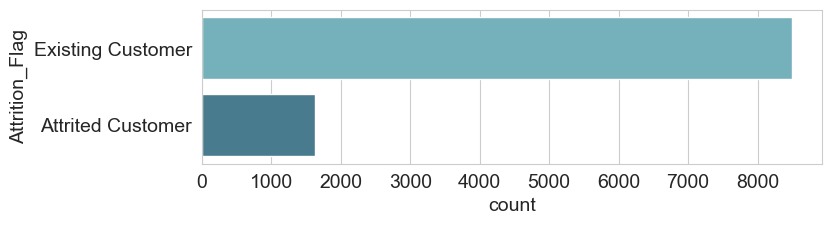

Процентное соотношение классов в признаке Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64


In [10]:
# Соотношение классов в целевом признаке
plt.figure(figsize=(8,2))
sns.countplot(data = data, y = 'Attrition_Flag', palette="GnBu_d")
plt.show()

print(f'Процентное соотношение классов в признаке Attrition_Flag')
print(100 * data['Attrition_Flag'].value_counts() / len(data))


В целевом признаке наблюдается явный дисбаланс классов.

ПРИЗНАКИ

Дискретные признаки:


In [11]:
discr_feature = ['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Процентное соотношение классов в признаке Gender
F    52.908068
M    47.091932
Name: Gender, dtype: float64
Процентное соотношение классов в признаке Dependent_count
3    26.977387
2    26.217044
1    18.149501
4    15.542609
0     8.926632
5     4.186827
Name: Dependent_count, dtype: float64
Процентное соотношение классов в признаке Education_Level
Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64
Процентное соотношение классов в признаке Marital_Status
Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64
Процентное соотношение классов в признаке Income_Category
Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_

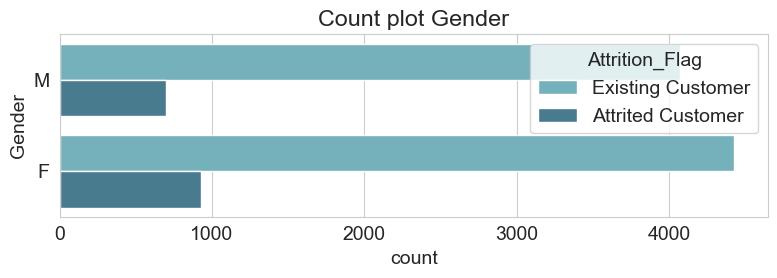

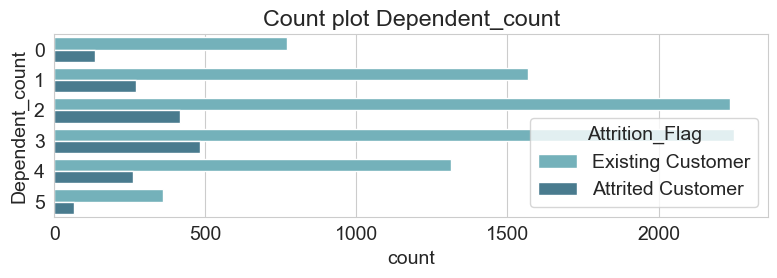

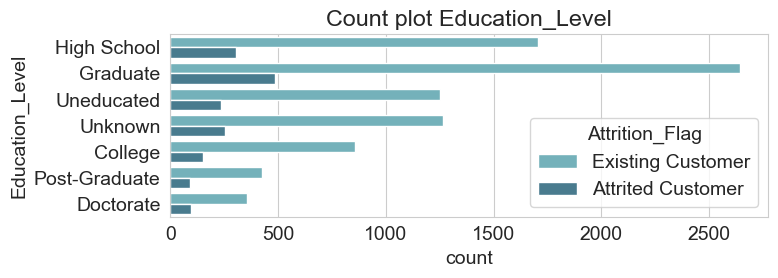

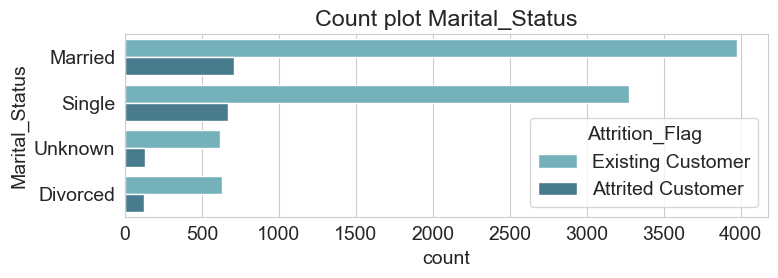

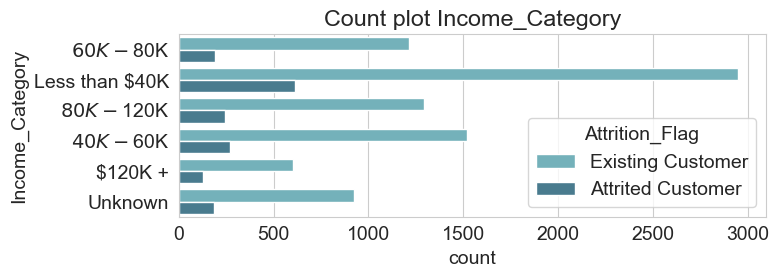

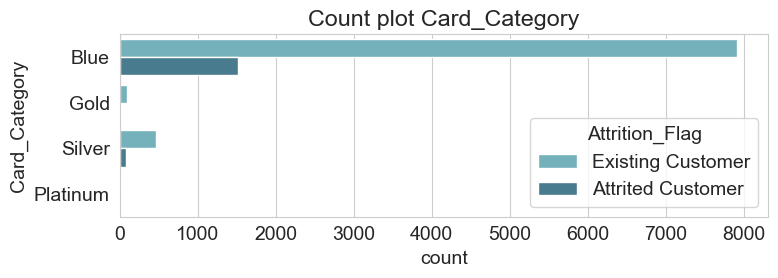

In [12]:
for col in discr_feature:
    viz_discr(col)

- Процентное соотношение между мужчинами и женщинами почти одинаковое (Женщины 53%, мужчины 47%).
- Большинство клиентов имеют 2-3 человека на иждевении (по 26% процентов).
- Наибольшее количество клиентов имеют высшее образование (30%).
- Процентное соотношение по семейному положению не имеет явного дисбаланса (Женатые = 46%, не женатые = 39%)
- Большинство клиентов имеют заработок менее 40 тыс.$ (35%)
- 93% процента клиентов оформаляют карту "Blue". 

Учитывая цветовую разметку по целевому признаку, в рассмотренных дискретных признаках нельзя выделить признаки, по котоырм можно явно выделить останется клиент или нет, так соотношение целевых классов сохраняется независимо от принимаемых значений.

ПРИЗНАКИ ВЗАИМОДЕЙСТВИЯ С КЛИЕНТОМ:

In [13]:
cont_feature = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

Процентное соотношение классов в признаке Total_Relationship_Count
3    22.760936
4    18.880221
5    18.672855
6    18.425990
2    12.274119
1     8.985879
Name: Total_Relationship_Count, dtype: float64
Процентное соотношение классов в признаке Months_Inactive_12_mon
3    37.977683
2    32.408413
1    22.049965
4     4.295448
5     1.757677
6     1.224449
0     0.286363
Name: Months_Inactive_12_mon, dtype: float64
Процентное соотношение классов в признаке Contacts_Count_12_mon
3    33.376123
2    31.865311
1    14.802014
4    13.745433
0     3.939962
5     1.737928
6     0.533228
Name: Contacts_Count_12_mon, dtype: float64


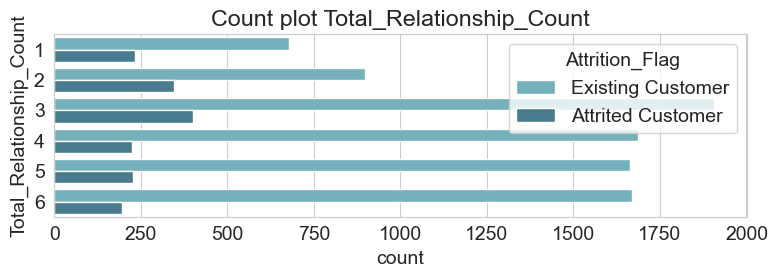

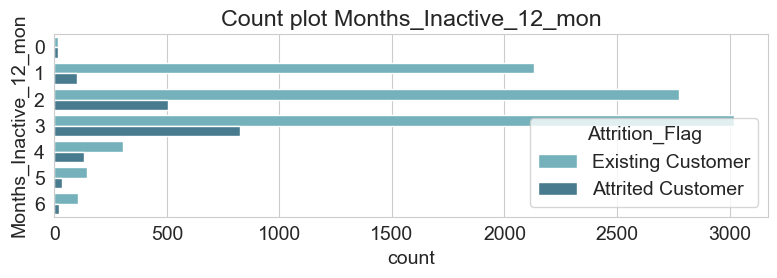

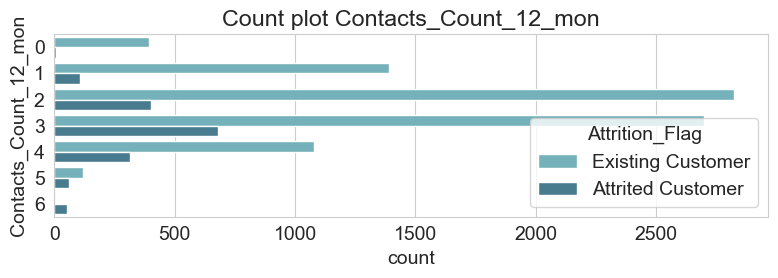

In [14]:
for col in cont_feature:
    viz_discr(col)

- В основном клиенты взаимодейтсвовали с кредиторами от 3 до 6 раз. 
- Большиснтво клиентов были не активны последние 1-3 месяца. Также по графику видно, что клиенты, которые были не активны всего 1 месяц уходили реже.
- Большинство клиентов имели 2-3 контакта за последний год. Причем чем больше контактов, тем вероятнее становится, что клиент уйдет.

По рассмотренным признакам взаимодействия с клиентом нельзя выделить критерии, по которым явно отделяются ушедшие клиенты.

НЕПРЕРЫВНЫЕ ПРИЗНАКИ

In [15]:
continue_feature = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

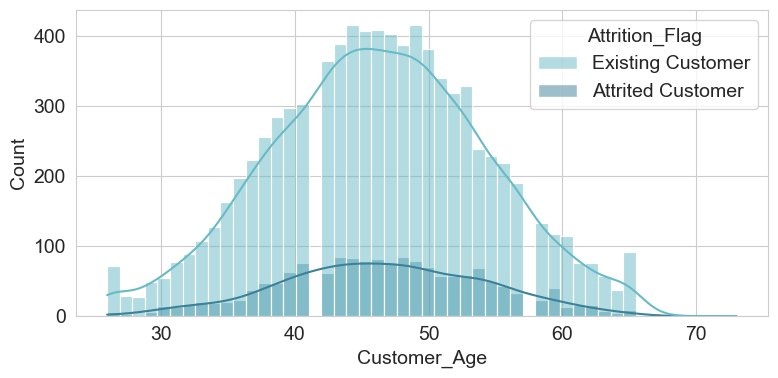

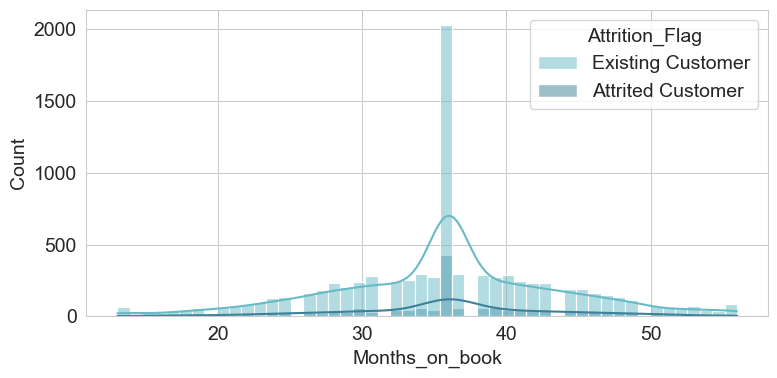

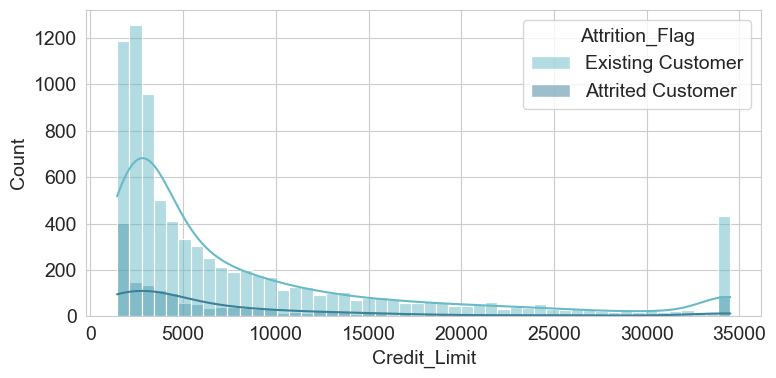

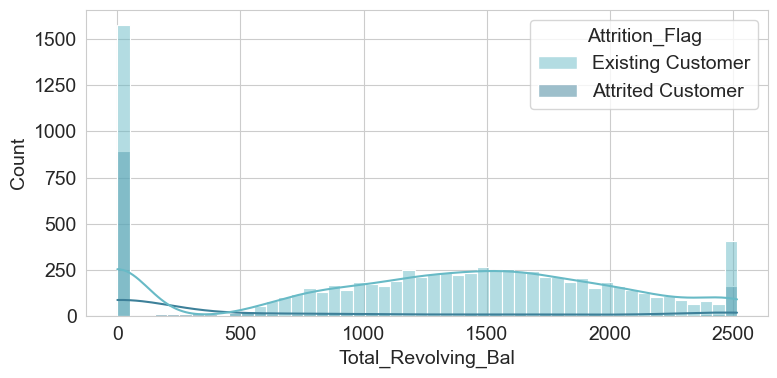

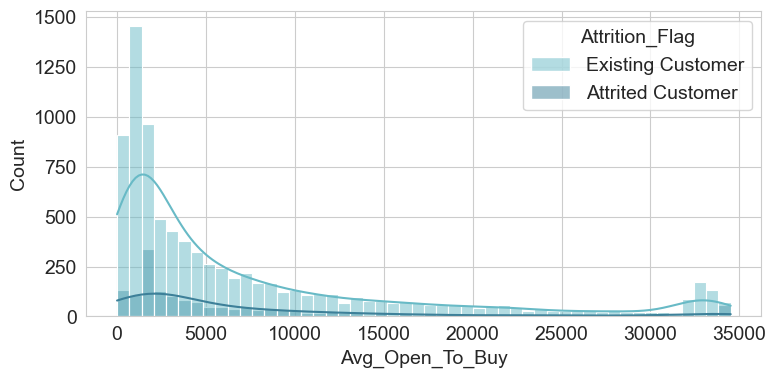

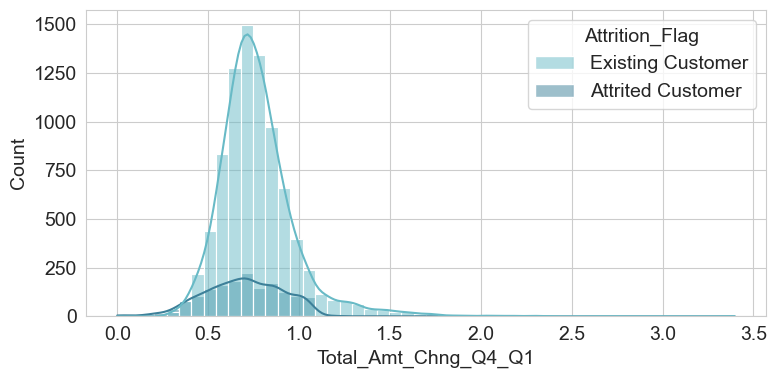

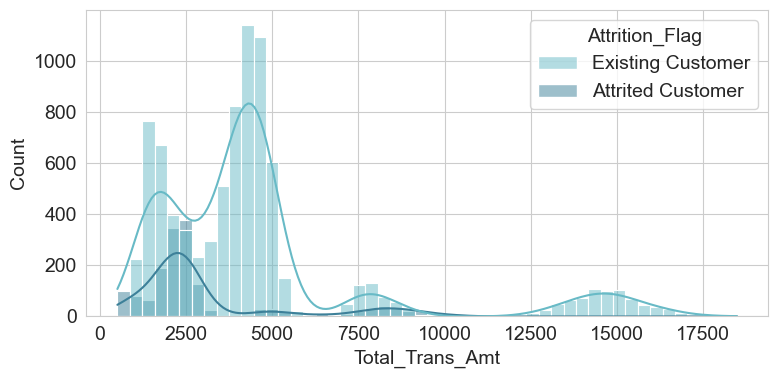

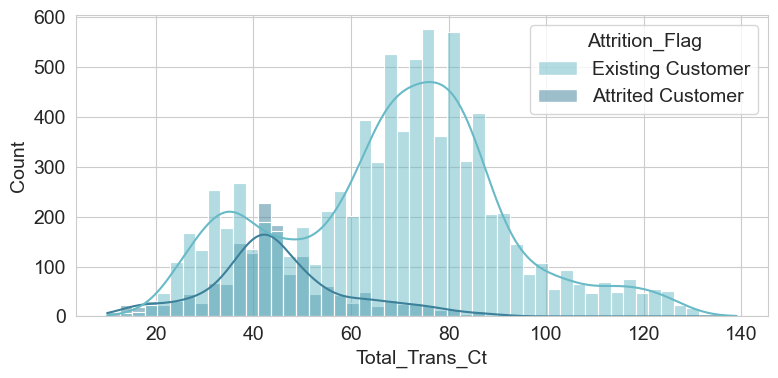

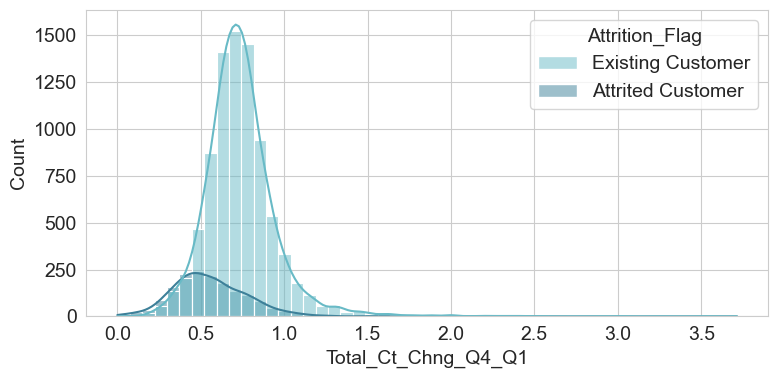

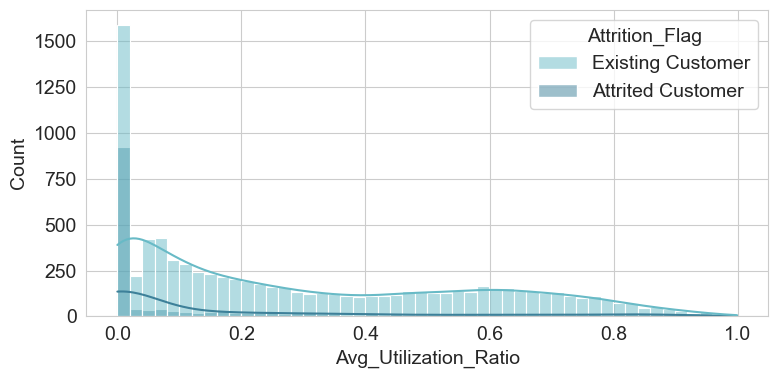

In [18]:
for feature in continue_feature:
    _ = plt.figure(figsize=(8, 4))
    _ = sns.histplot(data=data, x=feature, hue=target, bins=50, kde=True, palette="GnBu_d")
    plt.tight_layout()